# Decision Trees and Random Forests

## Decision Trees

Let's load the Iris data set, which is already included in Scikit Learn. 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

From the presentation we know, that features are in iris.data and labels in iris.target. Find out the dimensions of each. How many distinct labels do we have?

In [2]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [3]:
set(iris.target)

{0, 1, 2}

What are the names of the classes?

In [4]:
class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [46]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

1.0
1.0


Perform a cross validation like in the Logistic Regression Session

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=1)
predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)

Now a nice function for the visualization of the confusion matrix is given. Don't change it, and use it later.

In [6]:
## do not change anything below ##
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Note this this is a perfect example of the limitations of Jupyter notebooks. Once you start defining longer functions, it might make sense to move to a proper IDE.

Now calculate the confusion matrix and plot it.

In [25]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(iris.target, predicted)

Confusion matrix, without normalization
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


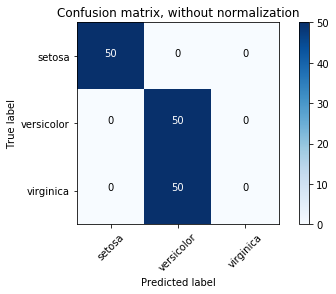

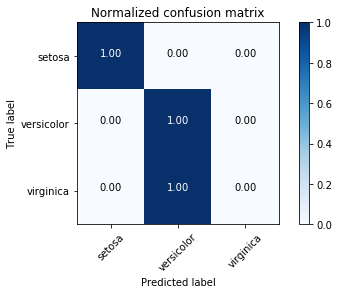

In [26]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Compute the accuracy using the accuracy_score function in sklearn.metrics

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.66666666666666663

Visualize the decision tree. First, you'll have to install the windows package. Download it from http://www.graphviz.org/.
You will probably also have to install the graphviz package first via *pip install graphviz*. 

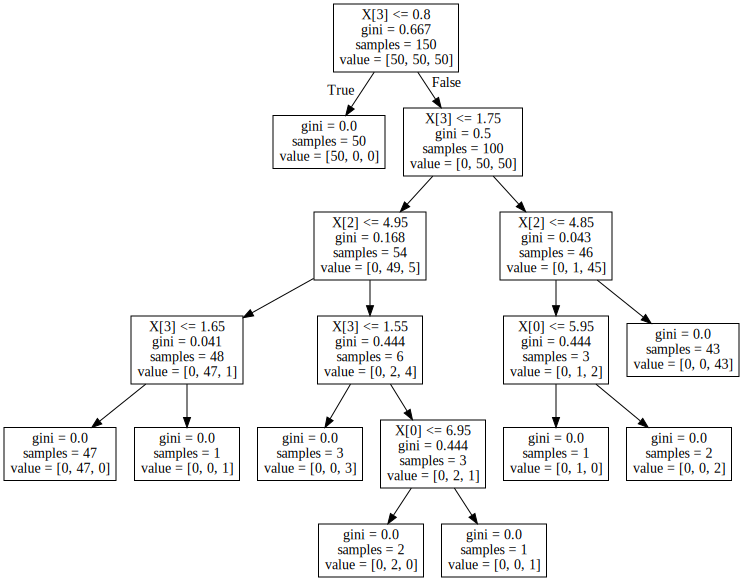

In [10]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'  #Make sure that the dot binary is in the path.
clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None)
graphviz.Source(dot_data) 

And we can make it a little bit more pretty via:

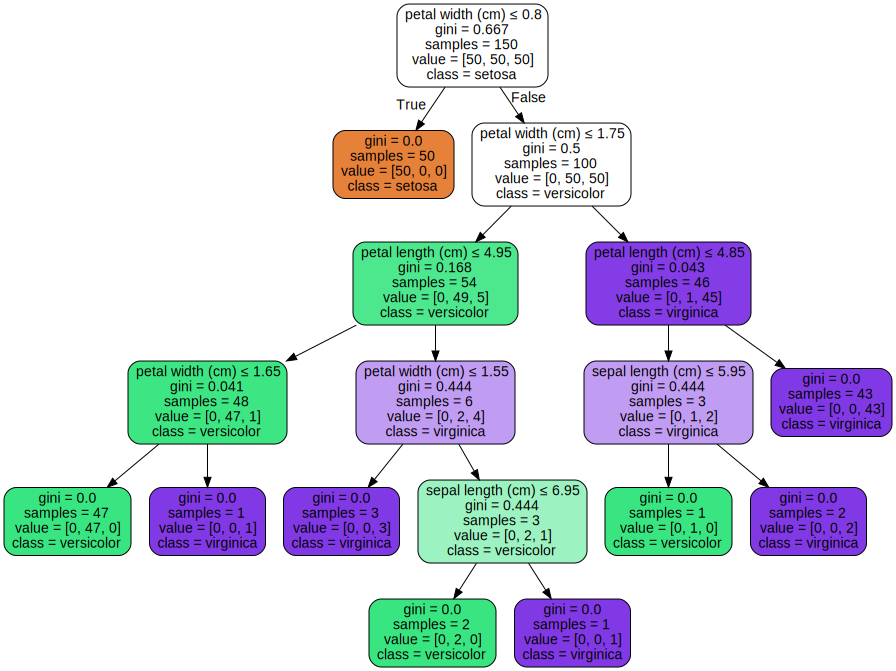

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graphviz.Source(dot_data)  

## Random Forest

Now let's experiment with a random forest.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [13]:
predicted_rf = cross_val_predict(rf, iris.data, iris.target, cv=10)

Plot the confusion matrix and compute the accuracy.

Confusion matrix, without normalization
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.98  0.02]
 [ 0.    0.1   0.9 ]]


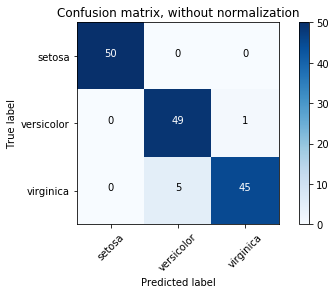

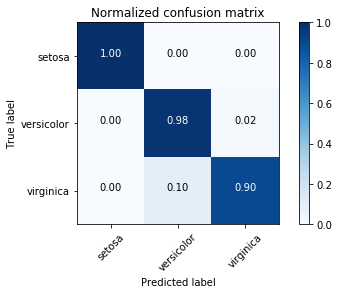

In [14]:
cnf_matrix = confusion_matrix(iris.target, predicted_rf)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [15]:
accuracy_score(iris.target, predicted_rf)

0.95999999999999996

Perform an importance plot.

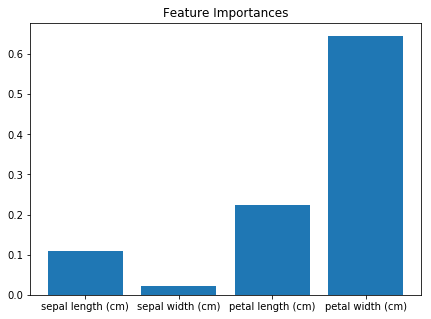

In [16]:
rf.fit(iris.data, iris.target)

f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title("Feature Importances")
plt.xticks(range(len(rf.feature_importances_)), iris.feature_names)
plt.show()

## Excercise: The Wine Data Set

Let's import the data set. It is already included in Scikit Learn. 

In [17]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

Find out the dimensions and names of the features and labels.

In [18]:
print(wine.data.shape)
print(wine.feature_names)
print(wine.target.shape)
print(wine.target_names)

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178,)
['class_0' 'class_1' 'class_2']


Investigate the dataset using decision trees and random forests. Experiment with different hyperparameters. What is the best accuracy you can get with decision trees? What is the best accuracy you can get with random forests?